<a href="https://colab.research.google.com/github/TheeratornP/DADS6003/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [25]:
pip install pydotplus

In [3]:
pip install xgboost

In [18]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv")
df

,Day,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables
label_encoders = {}
for column in ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play_Tennis']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df

,Day,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [7]:
# Split features and target variable
X = df.drop(['Day', 'Play_Tennis'], axis=1)
y = df['Play_Tennis']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and fit the model
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Predict and evaluate
ada_predictions = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)
print(f'Adaboost Accuracy: {ada_accuracy:.2f}')


Adaboost Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [9]:
#XGBoost
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

# Train the model
xgboost_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict and evaluate
xgboost_predictions = xgboost_model.predict(dtest)
xgboost_predictions = [1 if p > 0.5 else 0 for p in xgboost_predictions]
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
print(f'XGBoost Accuracy: {xgboost_accuracy:.2f}')

XGBoost Accuracy: 0.33


In [12]:
#Catboost
from catboost import CatBoostClassifier

# Create and fit the model
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0)
catboost_model.fit(X_train, y_train)

# Predict and evaluate
catboost_predictions = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print(f'CatBoost Accuracy: {catboost_accuracy:.2f}')


CatBoost Accuracy: 0.67


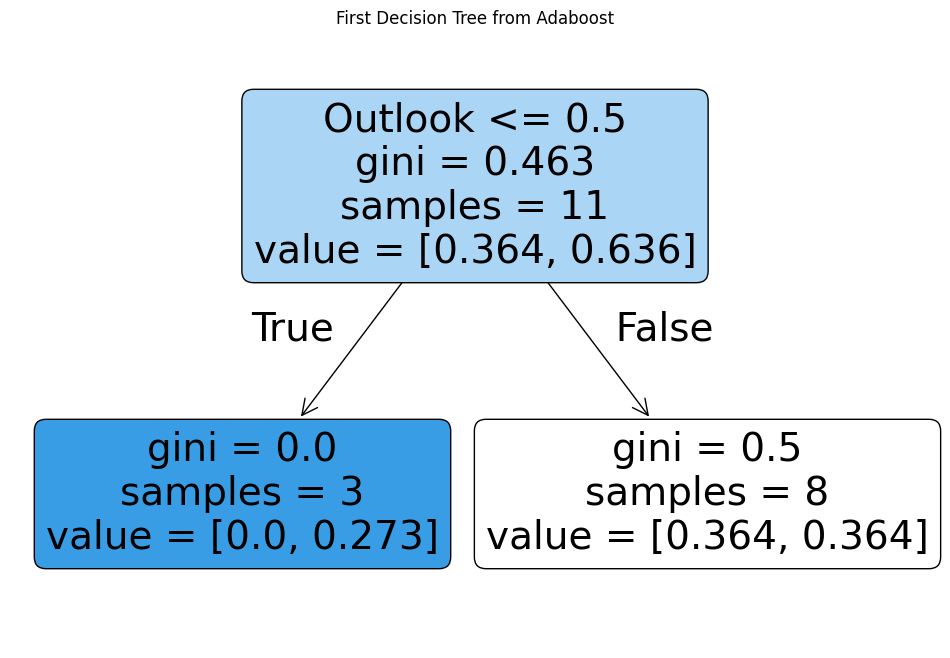

In [13]:
#Adaboost
# Access the first base estimator after fitting
plt.figure(figsize=(12, 8))
plot_tree(ada_model.estimators_[0], filled=True, feature_names=X.columns, rounded=True)
plt.title('First Decision Tree from Adaboost')
plt.show()


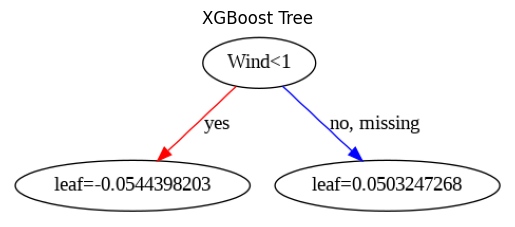

In [14]:
#XGBoost
import xgboost as xgb

# Plot the first tree in XGBoost
xgb.plot_tree(xgboost_model, num_trees=1)
plt.title('XGBoost Tree')
plt.show()


In [15]:
#RandomForest

data = pd.read_csv("https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv")


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [19]:
#Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [21]:
y_pred = model.predict(X_test)

In [22]:
data_rf = pd.DataFrame({'Actual': y_test.values.ravel(), 'Predicted': y_pred})
data_rf

,Actual,Predicted
0,1,1
1,0,0
2,1,1


In [23]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


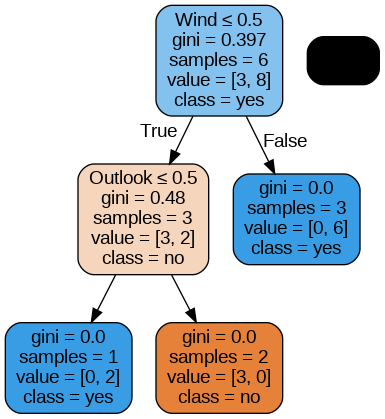

In [26]:
#Random Forest
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(model.estimators_[0], out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =X.columns ,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('playtennis.png')
Image(graph.create_png())